<h1>Loading dataset - Fashion MNIST</h1>

No. of examples in train data: 60000

No. of expamles in test data: 10000

Each Image size: 28x28 (so we have, 784 pixel values) (Gray Scale Images)

No. of target classes: 10

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |




Our dataset is in .csv format

We have (60,000 rows + 10,000 rows) and 785 columns.
Here, Rows correspond to the examples and Columns correspond to pixel values and label.
We have 1 column for label and 784 columns for pixel values.

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:
So load the actual class names in a list which we will use later.


In [1]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
import matplotlib
import pandas as pd 
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

We have two files one for train data and other for test data.

The train data contains 60,000 examples and the test data contains 10,000 examples.

You can load the dataset using pandas.read_csv(PATH_TO_THE_FILE)

In [4]:
train_data = pd.read_csv("/content/drive/My Drive/fashion-mnist_train.csv",delimiter=",")
test_data = pd.read_csv("/content/drive/My Drive/fashion-mnist_test.csv",delimiter=",")

# Explore the data

Let's explore the format of the dataset before training the model.

First let's see the shape of our train_data and test_data.

In [ ]:
train_data.shape

(60000, 785)

In [ ]:
test_data.shape

(10000, 785)

Now we can have a look at the staring rows by using head() method of our train_data and test_data dataframes.


In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


Lets us load the train and test labels into separate variables in numpy array format.

In [5]:
train_labels = train_data['label'].to_numpy()
test_labels = test_data['label'].to_numpy()

There are 60,000 labels associated with the 60,000 images in the training set and each label is an integer between 0 and 9.

In [ ]:
print(len(train_labels))
print(train_labels)

60000
[2 9 6 ... 8 8 7]


Similarly, there are 10,000 labels with the 10,000 images in the test set and each label is an integer between 0 and 9.

In [ ]:
print(len(test_labels))
print(test_labels)

10000
[0 1 2 ... 8 8 1]


Now, lets drop the label column from our train_data and test_data dataframes and store the remaining values (i.e. the pixel values) into separated variables in numpy array format.

In [6]:
flattened_train_images = train_data.drop('label', axis = 'columns').to_numpy()
flattened_test_images = test_data.drop('label', axis = 'columns').to_numpy()

Lets print the shape of our flattened images.

In [ ]:
print("Shape of flattened train images: ", flattened_train_images.shape)
print("Shape of flattened test images:", flattened_test_images.shape)

Shape of flattened train images:  (60000, 784)
Shape of flattened test images: (10000, 784)


(60000, 784) means that we have 60000 rows and 784 columns
Here the each row is an vector of 784 elements (pixel values) and we have 60000 such rows.

(10000, 784) means that we have 10000 rows and 784 columns
Here the each row is an vector of 784 elements (pixel values) and we have 10000 such rows

# Preprocess the data

First we will check if there is any null(NaN) values in our dataset.

In [ ]:
train_data.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

So as there is no null(NaN) values in our dataset, therefore, we don't need to Data Wrangling i.e. data cleaning.

Now he data must be preprocessed before training the model. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

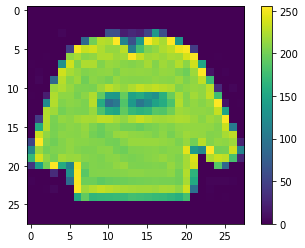

In [ ]:
plt.figure()
plt.imshow(flattened_train_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

Each image (instance) in the dataset has 784 pixels (features) and value of each feature(pixel) ranges from 0 to 255, and this range is too wide , hence we would need to use feature scaling here.So scale these values to a range of 0 to 1 before feeding them to the model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

So firstly we will scale the train_data.


In [7]:
scaledX = flattened_train_images / 255.0

In [ ]:
scaledX.shape

(60000, 784)

And then we will scale the test_data.

In [8]:
scaledY = flattened_test_images / 255.0

In [ ]:
scaledY.shape

(10000, 784)

To verify that the data is in the correct format and that you're ready to build and train the model.
So let's display the first 25 images from the training set and display the class name below each image.\
For this, we need to convert our 1-Dimensional vector to 2-Dimensional Vector for plotting it.
This can be done using reshape() method of numpy.





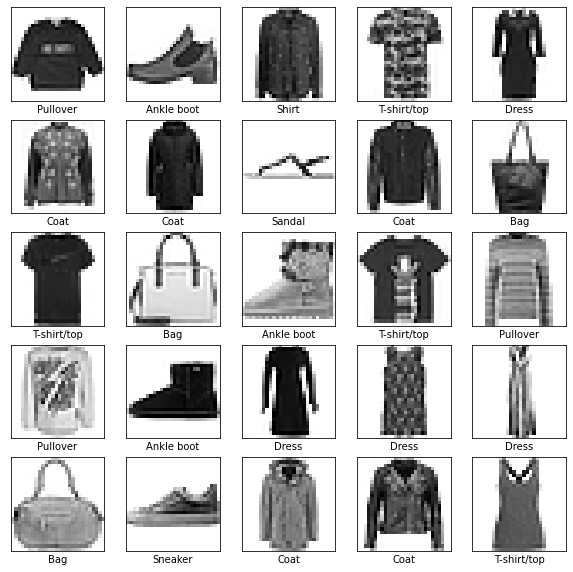

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(flattened_train_images[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Now let's check the skewness of our dataset.

Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero.

In [ ]:
train_data.label.skew()

0.0

Our dataset is skewness free as in our dataset all the classes has same no. of input images.We can see that by using Counter() method which gives the count of images that all classes have.

In [ ]:
Counter(train_data.label)

Counter({0: 6000,
         1: 6000,
         2: 6000,
         3: 6000,
         4: 6000,
         5: 6000,
         6: 6000,
         7: 6000,
         8: 6000,
         9: 6000})

# Feature Extraction

Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features). These new reduced set of features should then be able to summarize most of the information contained in the original set of features.

Now as we know that in our dataset we have 784 features, so it will take time to train the model and make predictions.

So lets apply Dimensionality Reduction to the training dataset to reduce the number of features in the dataset, so that the time taken for trainig the model and prediction is reduced. Also, we will calculate the scores based on the reduced features.

Here we will use Principle Components Analysis (PCA) techniques for dimensionality reduction.



In [10]:
pca = PCA(n_components=340)
pca.fit(scaledX)
PCA(copy=True, iterated_power='auto', n_components=340, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

train_data_pca = pca.transform(scaledX)
print("Shape of reduced train data:",train_data_pca.shape)


Shape of reduced train data: (60000, 340)


In [ ]:
# lets find the variance ratio
np.sum(pca.explained_variance_ratio_)

0.9786800023605179

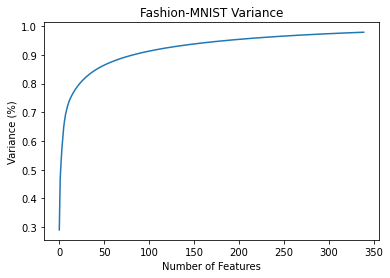

In [ ]:
# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

Here the Variance graph showed that by using around 340 features, we can retain approximately 97% of the data.



So now after applying PCA shape of reduced train data is (60000, 340).  

Now the train_data_pca that we got after applying dimensionality reduction are called compressed dataset.
Now, to check, if there was any significant information (data) loss for image of train_data_pca (that we got after dimensionality reduction), due to compression, as compared to original dataset scaledX, let us recover one of the images from train_data_pca dataset by decompressing (applying inverse) it and compare this recovered image (decompressed image) with its corresponding original image (from scaledX).




Let us recover (decompress) one of the images (instance) of train_data_pca.



In [11]:
# use inverse_transform to decompress back to 784 dimensions for train_data_pca
train_data_pca_recovered = pca.inverse_transform(train_data_pca)

In [ ]:
train_data_pca_recovered.shape

(60000, 784)

Now let's display the original images and compressed images for train_data_pca

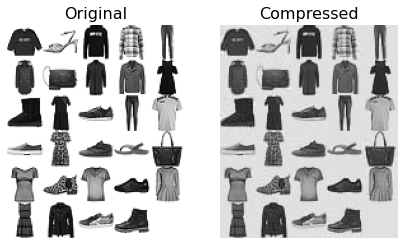

In [ ]:
# for train_data_pca
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(scaledX[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(train_data_pca_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()


By applying dimensionality reduction, we don't get any significant loss of information(quality) in the resulting train_data_pca dataset. Hence, we can use the train_data_pca (dimensionally reduced dataset) for training the model and predictions.

# Train the model
Training the  model requires the following steps:

1.   Feed the training data to the model. In this, we will use the compressed train data (train_data_pca) and train_lablels to train our model.
2.   Then model learns to associate the images and labels.
3. You ask the model to make predictions about a test set—in this we will use test_data_pca(reduced test data).
4. Verify that the predictions match the labels from the test_labels array.








Since, we have multiple classes (unique values - 0,1,2,...9) for the label in the target dataset , its a 'multi-class' Classification problem.

There are basically two strategies using which we can use multiple binary classifiers for multiclass classification. They are

(1) One-versus-all (OvA) strategy also called one-versus-the-rest

(2) One-versus-one (OvO) strategy

In OvA strategy, to create a system that can classify the digit images into 10 classes (from 0 to 9), we train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when we want to classify an image, we get the decision score from each classifier for that image and we select the class whose classifier outputs the highest score.

We will use OvA strategy for this multi-class Classification problem. When you try to use a 'Binary Classification Algorithm/Model(binary classifier)' for a multi-class classification problem using Scikit Learn, Scikit Learn by default uses OvA strategy internally.

We will use 6 algorithms here:


1.   Support Vector Classification (SVC)
2.  Gradient Boosting Classifictaion
3.Logistic Regression (Softmax regression)
4. Decision Tree Classification
5. Random Forest Classification
6. Ensemble with soft voting



Here we make a function showImage() to make it easier to display the image further. Then we show the first image from flattened_train_iamges that we will be use further for predictions. 

In [12]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

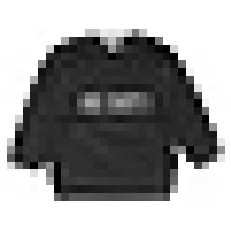

In [ ]:
showImage(flattened_train_images[0])

Now here we make a function plot_confusion_matrix to plot a graph of confusion matrix further.

In [13]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We will use the fit() method to train our model for different algorithms.

Let's try  **Support Vector Classification (SVC)** first.

In [ ]:
start1 = time.time()
svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(scaledX, train_labels)
end1 = time.time()
svm_time = end1-start1
print("SVM Time: {:0.2f} minute".format(svm_time/60.0))

SVM Time: 14.65 minute


In [ ]:
# Let us predict all instances of training dataset scaledX using the above trained model
train_labels_predict_svc = svc.predict(scaledX)

In [ ]:
train_labels[0]

2

In [ ]:
train_labels_predict_svc[0]

2

Lets see the image at flattened_train_images[0] to check whether the predicted label is correct or not.



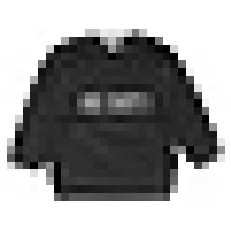

In [ ]:
showImage(flattened_train_images[0])

In [ ]:
sv_accuracy = accuracy_score(train_labels, train_labels_predict_svc)
sv_precision = precision_score(train_labels, train_labels_predict_svc, average='weighted')
sv_recall = recall_score(train_labels, train_labels_predict_svc, average='weighted')
sv_f1_score = f1_score(train_labels, train_labels_predict_svc, average='weighted')

print("Support Vector Classification Accuracy: ", sv_accuracy)
print("Support Vector Classification Precision: ", sv_precision)
print("Support Vector Classification Recall: ", sv_precision)
print("Support Vector Classification F1 Score: ", sv_f1_score)

Support Vector Classification Accuracy:  0.9021333333333333
Support Vector Classification Precision:  0.9013376080789182
Support Vector Classification Recall:  0.9013376080789182
Support Vector Classification F1 Score:  0.9014043150595836


So accuracy for SVC without PCA is: 0.90

Now as SVC is taking 15.22 minutes to get trained so now we will apply the same model on train_data_pca (reduced data)

In [ ]:
start1 = time.time()
svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(train_data_pca, train_labels)
end1 = time.time()
svm_time = end1-start1
print("SVM Time: {:0.2f} minute".format(svm_time/60.0))

SVM Time: 7.74 minute


In [ ]:
# Let us predict all instances of testing dataset test_data_pca using the above trained model
train_labels_predict_svc_pca = svc.predict(train_data_pca)

In [ ]:
train_labels[0]

2

In [ ]:
train_labels_predict_svc_pca[0]

2

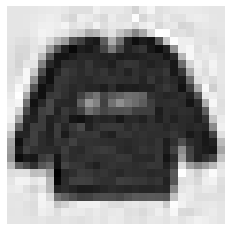

In [ ]:
showImage(train_data_pca_recovered[0])

In [ ]:
sv_accuracy = accuracy_score(train_labels, train_labels_predict_svc_pca)
sv_precision = precision_score(train_labels, train_labels_predict_svc_pca, average='weighted')
sv_recall = recall_score(train_labels, train_labels_predict_svc_pca, average='weighted')
sv_f1_score = f1_score(train_labels, train_labels_predict_svc_pca, average='weighted')

print("Support Vector Classification Accuracy: ", sv_accuracy)
print("Support Vector Classification Precision: ", sv_precision)
print("Support Vector Classification Recall: ", sv_precision)
print("Support Vector Classification F1 Score: ", sv_f1_score)

Support Vector Classification Accuracy:  0.8877333333333334
Support Vector Classification Precision:  0.886723034231151
Support Vector Classification Recall:  0.886723034231151
Support Vector Classification F1 Score:  0.8868620446311253


Now as the model takes less time to train the compressed data(train_data_pca) i.e 7 minutes but the accuracy is less. 

So now we will also check the accuracy of compressed data whether it is less, same or more for the other algorithms also to train the model.

Now let's try **XGBClassifier**

In [ ]:
start1 = time.time()
xgb = XGBClassifier(n_estimators=20, max_depth=10)
xgb.fit(scaledX, train_labels)
end1 = time.time()
xgb_time = end1-start1
print("XGBClassifier Time: {:0.2f} minute".format(xgb_time/60.0))

XGBClassifier Time: 12.14 minute


In [ ]:
# Let us predict all instances of training dataset scaledX using the above trained model
train_labels_predict_xgb_1 = xgb.predict(scaledX)

In [ ]:
xgb_accuracy = accuracy_score(train_labels, train_labels_predict_xgb_1)
xgb_precision = precision_score(train_labels, train_labels_predict_xgb_1, average='weighted')
xgb_recall = recall_score(train_labels, train_labels_predict_xgb_1, average='weighted')
xgb_f1_score = f1_score(train_labels, train_labels_predict_xgb_1, average='weighted')

print("XGBoost Classifier Accuracy: ", xgb_accuracy)
print("XGBoost Classifier Precision: ", xgb_precision)
print("XGBoost Classifier Recall: ", xgb_precision)
print("XGBoost Classifier F1 Score: ", xgb_f1_score)

XGBoost Classifier Accuracy:  0.9711
XGBoost Classifier Precision:  0.9713436640442754
XGBoost Classifier Recall:  0.9713436640442754
XGBoost Classifier F1 Score:  0.9710196162951918


Now let's do the same for the parameter values (no. of estimators = 100 and max_depth = 50)

In [16]:
start1 = time.time()
xgb_clf = XGBClassifier(n_estimators=100, max_depth=50)
xgb_clf.fit(scaledX, train_labels)
end1 = time.time()
xgb_time = end1-start1
print("XGBClassifier Time: {:0.2f} minute".format(xgb_time/60.0))

XGBClassifier Time: 101.53 minute


In [17]:
# Let us predict all instances of training dataset scaledX using the above trained model
train_labels_predict_xgb = xgb_clf.predict(scaledX)

In [ ]:
train_labels[0]

2

In [ ]:
train_labels_predict_xgb[0]

2

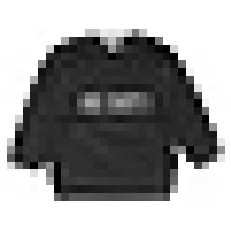

In [ ]:
showImage(flattened_train_images[0])

In [ ]:
xgb_accuracy = accuracy_score(train_labels, train_labels_predict_xgb)
xgb_precision = precision_score(train_labels, train_labels_predict_xgb, average='weighted')
xgb_recall = recall_score(train_labels, train_labels_predict_xgb, average='weighted')
xgb_f1_score = f1_score(train_labels, train_labels_predict_xgb, average='weighted')

print("XGBoost Classifier Accuracy: ", xgb_accuracy)
print("XGBoost Classifier Precision: ", xgb_precision)
print("XGBoost Classifier Recall: ", xgb_precision)
print("XGBoost Classifier F1 Score: ", xgb_f1_score)

XGBoost Classifier Accuracy:  1.0
XGBoost Classifier Precision:  1.0
XGBoost Classifier Recall:  1.0
XGBoost Classifier F1 Score:  1.0


Earlier XGBoostClassifier with no. of estimators as 20 and max_depth as 10 gives accuracy 0.97.

Now for the same XGBoostClassifier with no. of estimators as 100 and max_depth as 50 we got accuracy of 1.0.

From this we conclude that, by increasing the no. of estimators and max_depth, we are getting better scores.

So for the other algorithms we will use n_estimators = 100 and max_depth = 50

Now let's do the same for compressed data(train_data_pca)and check it's accuracy.

In [ ]:
start1 = time.time()
xgb_clf = XGBClassifier(n_estimators=100, max_depth=50)
xgb_clf.fit(train_data_pca, train_labels)
end1 = time.time()
xgb_time = end1-start1
print("XGBClassifier Time: {:0.2f} minute".format(xgb_time/60.0))

XGBClassifier Time: 107.75 minute


In [ ]:
# Let us predict all instances of training dataset train_data_pca using the above trained model
train_labels_predict_xgb_pca = xgb_clf.predict(train_data_pca)

In [ ]:
xgb_accuracy = accuracy_score(train_labels, train_labels_predict_xgb_pca)
xgb_precision = precision_score(train_labels, train_labels_predict_xgb_pca, average='weighted')
xgb_recall = recall_score(train_labels, train_labels_predict_xgb_pca, average='weighted')
xgb_f1_score = f1_score(train_labels, train_labels_predict_xgb_pca, average='weighted')

print("XGBoost Classifier Accuracy: ", xgb_accuracy)
print("XGBoost Classifier Precision: ", xgb_precision)
print("XGBoost Classifier Recall: ", xgb_precision)
print("XGBoost Classifier F1 Score: ", xgb_f1_score)

XGBoost Classifier Accuracy:  1.0
XGBoost Classifier Precision:  1.0
XGBoost Classifier Recall:  1.0
XGBoost Classifier F1 Score:  1.0


Now let's try **DecisionTreeClassifier** 


In [ ]:
start1 = time.time()
dec_tree_clf = DecisionTreeClassifier(max_depth=50)
dec_tree_clf.fit(scaledX,train_labels)
end1 = time.time()
dec_time = end1-start1
print("DecisionTreeClassifier Time: {:0.2f} minute".format(dec_time/60.0))

DecisionTreeClassifier Time: 0.84 minute


In [ ]:
# Let us predict all instances of training dataset scaledX using the above trained model
train_labels_predict_dec = dec_tree_clf.predict(scaledX)

In [ ]:
train_labels[0]

2

In [ ]:
train_labels_predict_dec[0]

2

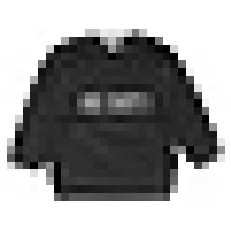

In [ ]:
showImage(flattened_train_images[0])

In [ ]:
dt_accuracy = accuracy_score(train_labels, train_labels_predict_dec)
dt_precision = precision_score(train_labels, train_labels_predict_dec, average='weighted')
dt_recall = recall_score(train_labels, train_labels_predict_dec, average='weighted')
dt_f1_score = f1_score(train_labels, train_labels_predict_dec, average='weighted')

print("Decision Tree Accuracy: ", dt_accuracy)
print("Decision Tree Precision: ", dt_precision)
print("Decision Tree Recall: ", dt_precision)
print("Decision Tree F1 Score: ", dt_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0


Now let's do the same for compressed data(train_data_pca)and check it's accuracy.



In [ ]:
start1 = time.time()
dec_tree_clf = DecisionTreeClassifier(max_depth=50)
dec_tree_clf.fit(train_data_pca,train_labels)
end1 = time.time()
dec_time = end1-start1
print("DecisionTreeClassifier Time: {:0.2f} minute".format(dec_time/60.0))

DecisionTreeClassifier Time: 1.21 minute


In [ ]:
# Let us predict all instances of training dataset train_data_pca using the above trained model
train_labels_predict_dec_pca = dec_tree_clf.predict(train_data_pca)

In [ ]:
dt_accuracy = accuracy_score(train_labels, train_labels_predict_dec_pca)
dt_precision = precision_score(train_labels, train_labels_predict_dec_pca, average='weighted')
dt_recall = recall_score(train_labels, train_labels_predict_dec_pca, average='weighted')
dt_f1_score = f1_score(train_labels, train_labels_predict_dec_pca, average='weighted')

print("Decision Tree Accuracy: ", dt_accuracy)
print("Decision Tree Precision: ", dt_precision)
print("Decision Tree Recall: ", dt_precision)
print("Decision Tree F1 Score: ", dt_f1_score)

Decision Tree Accuracy:  0.9998666666666667
Decision Tree Precision:  0.999866844207723
Decision Tree Recall:  0.999866844207723
Decision Tree F1 Score:  0.9998666666074074


Now let's try **RandomForestClassifier**

In [ ]:
start1 = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50)
rnd_clf.fit(scaledX,train_labels)
end1 = time.time()
rnd_time = end1-start1
print("RandomForestClassifier Time: {:0.2f} minute".format(rnd_time/60.0))

RandomForestClassifier Time: 1.72 minute


In [ ]:
# Let us predict all instances of training dataset scaledX using the above trained model
train_labels_predict_rnd = rnd_clf.predict(scaledX)

In [ ]:
train_labels[0]

2

In [ ]:
train_labels_predict_rnd[0]

2

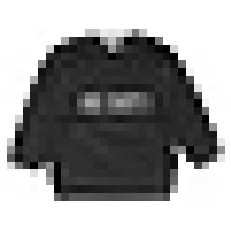

In [ ]:
showImage(flattened_train_images[0])

In [ ]:
rf_accuracy = accuracy_score(train_labels, train_labels_predict_rnd)
rf_precision = precision_score(train_labels, train_labels_predict_rnd, average='weighted')
rf_recall = recall_score(train_labels, train_labels_predict_rnd, average='weighted')
rf_f1_score = f1_score(train_labels, train_labels_predict_rnd, average='weighted')

print("RandomForestClassifier Accuracy: ", rf_accuracy)
print("RandomForestClassifier Precision: ", rf_precision)
print("RandomForestClassifier Recall: ", rf_precision)
print("RandomForestClassifier F1 Score: ", rf_f1_score)

RandomForestClassifier Accuracy:  1.0
RandomForestClassifier Precision:  1.0
RandomForestClassifier Recall:  1.0
RandomForestClassifier F1 Score:  1.0


Now let's do the same for compressed data(train_data_pca)and check it's accuracy.

In [ ]:
start1 = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50)
rnd_clf.fit(train_data_pca,train_labels)
end1 = time.time()
rnd_time = end1-start1
print("RandomForestClassifier Time: {:0.2f} minute".format(rnd_time/60.0))

RandomForestClassifier Time: 3.05 minute


In [ ]:
# Let us predict all instances of training dataset train_data_pca using the above trained model
train_labels_predict_rnd_pca = rnd_clf.predict(train_data_pca)

In [ ]:
rf_accuracy = accuracy_score(train_labels, train_labels_predict_rnd_pca)
rf_precision = precision_score(train_labels, train_labels_predict_rnd_pca, average='weighted')
rf_recall = recall_score(train_labels, train_labels_predict_rnd_pca, average='weighted')
rf_f1_score = f1_score(train_labels, train_labels_predict_rnd_pca, average='weighted')

print("RandomForestClassifier Accuracy: ", rf_accuracy)
print("RandomForestClassifier Precision: ", rf_precision)
print("RandomForestClassifier Recall: ", rf_precision)
print("RandomForestClassifier F1 Score: ", rf_f1_score)

RandomForestClassifier Accuracy:  1.0
RandomForestClassifier Precision:  1.0
RandomForestClassifier Recall:  1.0
RandomForestClassifier F1 Score:  1.0


Now let's try **Logistic Regression**



In [ ]:
start1 = time.time()
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
log_clf.fit(scaledX,train_labels)
end1 = time.time()
lr_time = end1-start1
print("Logistic Regression Time: {:0.2f} minute".format(lr_time/60.0))

Logistic Regression Time: 0.56 minute


In [ ]:
# Let us predict all instances of training dataset scaledX using the above trained model
train_labels_predict_log = log_clf.predict(scaledX)

In [ ]:
train_labels[0]

2

In [ ]:
train_labels_predict_log[0]

2

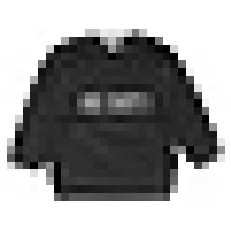

In [ ]:
showImage(flattened_train_images[0])

In [ ]:
lr_accuracy = accuracy_score(train_labels, train_labels_predict_log)
lr_precision = precision_score(train_labels, train_labels_predict_log, average='weighted')
lr_recall = recall_score(train_labels, train_labels_predict_log, average='weighted')
lr_f1_score = f1_score(train_labels, train_labels_predict_log, average='weighted')

print("Logistic Regression Accuracy: ", lr_accuracy)
print("Logistic Regression Precision: ", lr_precision)
print("Logistic Regression Recall: ", lr_precision)
print("Logistic Regression F1 Score: ", lr_f1_score)

Logistic Regression Accuracy:  0.86545
Logistic Regression Precision:  0.8646161323349661
Logistic Regression Recall:  0.8646161323349661
Logistic Regression F1 Score:  0.8647433809831785


Now let's do the same for compressed data(train_data_pca)and check it's accuracy.



In [ ]:
start1 = time.time()
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
log_clf.fit(train_data_pca,train_labels)
end1 = time.time()
lr_time = end1-start1
print("Logistic Regression Time: {:0.2f} minute".format(lr_time/60.0))

Logistic Regression Time: 0.37 minute


In [ ]:
# Let us predict all instances of training dataset train_data_pca using the above trained model
train_labels_predict_log_pca = log_clf.predict(train_data_pca)

In [ ]:
lr_accuracy = accuracy_score(train_labels, train_labels_predict_log_pca)
lr_precision = precision_score(train_labels, train_labels_predict_log_pca, average='weighted')
lr_recall = recall_score(train_labels, train_labels_predict_log_pca, average='weighted')
lr_f1_score = f1_score(train_labels, train_labels_predict_log_pca, average='weighted')

print("Logistic Regression Accuracy: ", lr_accuracy)
print("Logistic Regression Precision: ", lr_precision)
print("Logistic Regression Recall: ", lr_precision)
print("Logistic Regression F1 Score: ", lr_f1_score)

Logistic Regression Accuracy:  0.8679
Logistic Regression Precision:  0.8669411460883353
Logistic Regression Recall:  0.8669411460883353
Logistic Regression F1 Score:  0.8672207889121059


Now let's try **Ensemble with soft voting**

In [ ]:
start1 = time.time()
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')
voting_clf.fit(scaledX, train_labels)
end1 = time.time()
ens_time = end1-start1
print("Ensemble with soft voting Time: {:0.2f} minute".format(ens_time/60.0))

Ensemble with soft voting Time: 2.29 minute


In [ ]:
# Let us predict all instances of training dataset scaledX using the above trained model
train_labels_predict_ens = voting_clf.predict(scaledX)

In [ ]:
train_labels[0]

2

In [ ]:
train_labels_predict_ens[0]

2

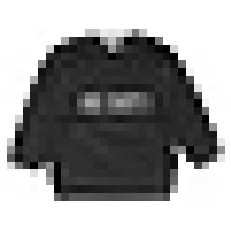

In [ ]:
showImage(flattened_train_images[0])

In [ ]:
ens_accuracy = accuracy_score(train_labels, train_labels_predict_ens)
ens_precision = precision_score(train_labels, train_labels_predict_ens, average='weighted')
ens_recall = recall_score(train_labels, train_labels_predict_ens, average='weighted')
ens_f1_score = f1_score(train_labels, train_labels_predict_ens, average='weighted')

print("Ensemble with soft voting Accuracy: ", ens_accuracy)
print("Ensemble with soft voting Precision: ", ens_precision)
print("Ensemble with soft voting Recall: ", ens_precision)
print("Ensemble with soft voting F1 Score: ", ens_f1_score)

Ensemble with soft voting Accuracy:  0.9606333333333333
Ensemble with soft voting Precision:  0.9607961660804476
Ensemble with soft voting Recall:  0.9607961660804476
Ensemble with soft voting F1 Score:  0.9605015310861079


Now let's do the same for compressed data(train_data_pca)and check it's accuracy.



In [ ]:
start1 = time.time()
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')
voting_clf.fit(train_data_pca, train_labels)
end1 = time.time()
ens_time = end1-start1
print("Ensemble with soft voting Time: {:0.2f} minute".format(ens_time/60.0))

Ensemble with soft voting Time: 3.24 minute


In [ ]:
# Let us predict all instances of training dataset train_data_pca using the above trained model
train_labels_predict_ens_pca = voting_clf.predict(train_data_pca)

In [ ]:
ens_accuracy = accuracy_score(train_labels, train_labels_predict_ens_pca)
ens_precision = precision_score(train_labels, train_labels_predict_ens_pca, average='weighted')
ens_recall = recall_score(train_labels, train_labels_predict_ens_pca, average='weighted')
ens_f1_score = f1_score(train_labels, train_labels_predict_ens_pca, average='weighted')

print("Ensemble with soft voting Accuracy: ", ens_accuracy)
print("Ensemble with soft voting Precision: ", ens_precision)
print("Ensemble with soft voting Recall: ", ens_precision)
print("Ensemble with soft voting F1 Score: ", ens_f1_score)

Ensemble with soft voting Accuracy:  0.96275
Ensemble with soft voting Precision:  0.9628591698309875
Ensemble with soft voting Recall:  0.9628591698309875
Ensemble with soft voting F1 Score:  0.9626291139961498


As we seen above, compressed data (train_data_pca) is taking more time to train except SVC and also for some models accuracy is little bit less.

Hence we conclude that we will use the original data i.e. scaledX for testing the models.

# Evaluate the model

As we have trained our models, now we have to test our models that how accurate will they perform on the test data.

So let us use **cross validation** to find the proper score of each model, also to ensure that the model is not overfitting or underfitting.



*   If the cross validation score values for a performance measure (say accuracy) are not varying significantly for various folds (k-folds) then we can say that the model is not overfitting.
*   If the cross validation score values for a performance measure (say accuracy) are not very low for various folds (k-folds) then we can say that the model is not underfitting.

We will perform **k-fold cross-validation**

In this we will randomly split the training set into 3 distinct subsets called **folds** (cv=3). Since cross validation is a computing intensive and time consuming process, we are limiting 'cv' (no. of folds) to 3 instead of normally 10 folds.

Then will train and evaluate each model 3 times by picking a different fold for evaluation every time and training on the other 2 folds.

The result will be an array containing the 3 evaluation scores for each of the measures .

We will use **cross_val_score()** function to calculate the accuracy.

But accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets.
Since our current training dataset is not skewed, but the future test dataset  on which the model runs can be skewed, hence, considering we may get skewed dataset in future, let us calculate Precision, Recall and F1 score also for the models.

And will use **cross_val_predict()** function to create confusion matrix to calculate Precision, Recall and F1 score.






In [14]:
# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Let us calculate accuracy, precision, recall, F1 score for **SVC**

In [ ]:
svc_scores = cross_val_score(svc, scaledX, train_labels, cv=3, scoring="accuracy") 
display_scores(svc_scores)
svc_accuracy = svc_scores.mean()

train_labels_predict_svc = cross_val_predict(svc, scaledX, train_labels, cv=3)
svc_cm = confusion_matrix(train_labels, train_labels_predict_svc)
svc_precision = precision_score(train_labels, train_labels_predict_svc, average='weighted')
svc_recall = recall_score(train_labels, train_labels_predict_svc, average='weighted')
svc_f1_score = f1_score(train_labels, train_labels_predict_svc, average='weighted')
print("Confusion Matrix: \n", svc_cm)
print('\nPlotting confusion matrix')
plt.figure()
plot_confusion_matrix(svc_cm, class_names)
plt.show()
print("SVC CV Accuracy: ", svc_accuracy)
print("SVC CV Precision: ", svc_precision)
print("SVC CV Recall: ", svc_precision)
print("SVC CV F1 Score: ", svc_f1_score)

Scores: [0.85385 0.85425 0.8513 ]
Mean: 0.8531333333333334
Standard deviation: 0.001306607141501321
Confusion Matrix: [[4995   28   99  236   19    5  561    0   57    0]
 [  52 5798   15  112    6    0   14    0    3    0]
 [ 158   18 4577   72  675    1  470    0   27    2]
 [ 282  111   76 5192  172    0  152    0   15    0]
 [  19   16  607  234 4641    0  462    0   21    0]
 [   4    2    1    4    0 5656    0  228   16   89]
 [ 940   21  701  201  537    0 3514    0   85    1]
 [   0    0    0    0    0  220    0 5583    4  193]
 [  82    6   65   57   29   45  118   25 5570    3]
 [   1    1    1    0    0  100    1  227    7 5662]]
SVC CV Accuracy:  0.8531333333333334
SVC CV Precision:  0.8523840215475816
SVC CV Recall:  0.8523840215475816
SVC CV F1 Score:  0.8523177764040923


Let us calculate accuracy, precision, recall, F1 score for **XGBClassifier**

Scores: [0.89385 0.89115 0.8889 ]
Mean: 0.8913000000000001
Standard deviation: 0.0020236106344848114
Confusion Matrix: 
 [[5226    7   68  169   23    7  456    0   44    0]
 [  13 5847   11   97   12    0   13    0    7    0]
 [  71    6 4995   51  543    1  305    0   28    0]
 [ 132   23   37 5513  162    2  119    0   12    0]
 [   9   10  429  209 5025    0  298    0   20    0]
 [   1    2    0    1    0 5769    2  152   17   56]
 [ 909    7  592  151  452    2 3802    0   85    0]
 [   0    0    0    0    0   70    0 5724   13  193]
 [  10    3   17   19   26   14   60   11 5834    6]
 [   0    1    2    2    1   53    0  191    7 5743]]

Plotting confusion matrix


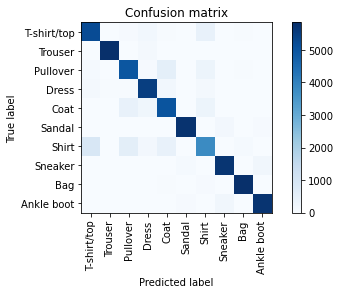

XGBoost Classifier CV Accuracy:  0.8913000000000001
XGBoost Classifier CV Precision:  0.8902388749003232
XGBoost Classifier CV Recall:  0.8902388749003232
XGBoost Classifier CV F1 Score:  0.8900969060759671


In [18]:
xgb_scores = cross_val_score(xgb_clf, scaledX, train_labels, cv=3, scoring="accuracy") 
display_scores(xgb_scores)
xgb_accuracy = xgb_scores.mean() 

train_labels_predict_xgb = cross_val_predict(xgb_clf, scaledX, train_labels, cv=3)
xgb_cm = confusion_matrix(train_labels, train_labels_predict_xgb)
xgb_precision = precision_score(train_labels, train_labels_predict_xgb, average='weighted')
xgb_recall = recall_score(train_labels, train_labels_predict_xgb, average='weighted')
xgb_f1_score = f1_score(train_labels, train_labels_predict_xgb, average='weighted')
print("Confusion Matrix: \n", xgb_cm)
print('\nPlotting confusion matrix')
plt.figure()
plot_confusion_matrix(xgb_cm, class_names)
plt.show()
print("XGBoost Classifier CV Accuracy: ", xgb_accuracy)
print("XGBoost Classifier CV Precision: ", xgb_precision)
print("XGBoost Classifier CV Recall: ", xgb_precision)
print("XGBoost Classifier CV F1 Score: ", xgb_f1_score)

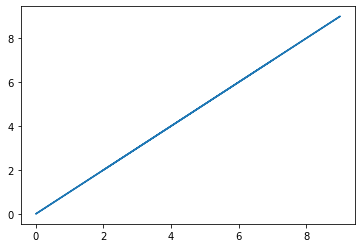

In [ ]:
plt.plot(train_labels, train_labels_predict_xgb)
plt.show()

Let us calculate accuracy, precision, recall, F1 score for **DecisionTreeClassifier**

Scores: [0.7954  0.78815 0.7887 ]
Mean: 0.7907500000000001
Standard deviation: 0.0032957042747592943
Confusion Matrix: 
 [[4440   49  138  288   85   10  915    4   58   13]
 [  53 5667   25  176   24   11   27    0   15    2]
 [ 142   15 4020  108  858    9  769    0   70    9]
 [ 283  196  106 4745  329   14  261    2   58    6]
 [  68   28  874  324 3972    4  668    0   55    7]
 [  12   14    9   13    3 5302   19  356   93  179]
 [ 893   39  758  227  676   14 3258    2  123   10]
 [   3    0    0    0    1  368    0 5196   29  403]
 [  65   18   83   46   60   73  143   35 5453   24]
 [   3    4    5    3    3  145   11  432   17 5377]]

Plotting confusion matrix


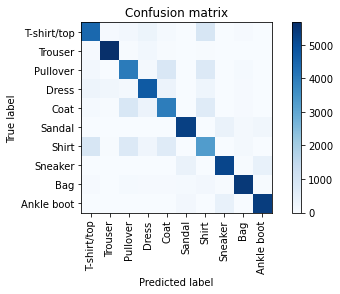

Decision Tree Classification CV Accuracy:  0.7907500000000001
Decision Tree Classification CV Precision:  0.7908288762503403
Decision Tree Classification CV Recall:  0.7908288762503403
Decision Tree Classification CV F1 Score:  0.7906552115815807


In [ ]:
dec_scores = cross_val_score(dec_tree_clf, scaledX, train_labels, cv=3, scoring="accuracy") 
display_scores(dec_scores)
dec_accuracy = dec_scores.mean()

train_labels_predict_dec = cross_val_predict(dec_tree_clf, scaledX, train_labels, cv=3)
dec_cm = confusion_matrix(train_labels, train_labels_predict_dec)
dec_precision = precision_score(train_labels, train_labels_predict_dec, average='weighted')
dec_recall = recall_score(train_labels, train_labels_predict_dec, average='weighted')
dec_f1_score = f1_score(train_labels, train_labels_predict_dec, average='weighted')
print("Confusion Matrix: \n", dec_cm)
print('\nPlotting confusion matrix')
plt.figure()
plot_confusion_matrix(dec_cm, class_names)
plt.show()
print("Decision Tree Classification CV Accuracy: ", dec_accuracy)
print("Decision Tree Classification CV Precision: ", dec_precision)
print("Decision Tree Classification CV Recall: ", dec_precision)
print("Decision Tree Classification CV F1 Score: ", dec_f1_score)

Let us calculate accuracy, precision, recall, F1 score for **RandomForestClassifier**

Scores: [0.8776  0.8797  0.87935]
Mean: 0.8788833333333333
Standard deviation: 0.000918634251968028
Confusion Matrix: 
 [[5171    4   76  193   23    6  476    0   51    0]
 [  12 5782   27  134    8    1   33    0    3    0]
 [  39    2 4908   62  673    1  278    0   37    0]
 [ 122   19   45 5509  175    0  118    0   12    0]
 [   9    9  505  245 4950    1  263    0   18    0]
 [   0    1    0    3    0 5754    0  166   20   56]
 [ 970    7  728  140  557    2 3500    0   96    0]
 [   0    0    0    0    0  107    0 5630    9  254]
 [   8    5   23   19   27   18   65   15 5815    5]
 [   0    0    1    1    1   69    1  223    8 5696]]

Plotting confusion matrix


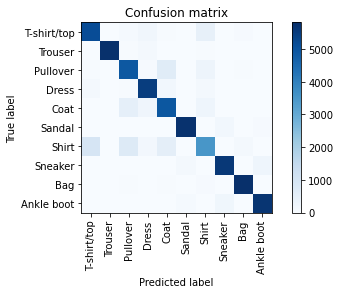

Random Forest Classification CV Accuracy:  0.8788833333333333
Random Forest Classification CV Precision:  0.8775237424704583
Random Forest Classification CV Recall:  0.8775237424704583
Random Forest Classification CV F1 Score:  0.8768518349972128


In [ ]:
rnd_scores = cross_val_score(rnd_clf, scaledX, train_labels, cv=3, scoring="accuracy") 
display_scores(rnd_scores)
rnd_accuracy = rnd_scores.mean()

train_labels_predict_rnd = cross_val_predict(rnd_clf, scaledX, train_labels, cv=3)
rnd_cm = confusion_matrix(train_labels, train_labels_predict_rnd)
rnd_precision = precision_score(train_labels, train_labels_predict_rnd, average='weighted')
rnd_recall = recall_score(train_labels, train_labels_predict_rnd, average='weighted')
rnd_f1_score = f1_score(train_labels, train_labels_predict_rnd, average='weighted')
print("Confusion Matrix: \n", rnd_cm)
print('\nPlotting confusion matrix')
plt.figure()
plot_confusion_matrix(rnd_cm, class_names)
plt.show()
print("Random Forest Classification CV Accuracy: ", rnd_accuracy)
print("Random Forest Classification CV Precision: ", rnd_precision)
print("Random Forest Classification CV Recall: ", rnd_precision)
print("Random Forest Classification CV F1 Score: ", rnd_f1_score)

Let us calculate accuracy, precision, recall, F1 score for **Logistic Regression**

Scores: [0.85475 0.8542  0.8535 ]
Mean: 0.8541500000000001
Standard deviation: 0.0005115336417740806
Confusion Matrix: 
 [[4970   25  119  256   23    7  524    2   73    1]
 [  19 5777   32  130   18    0   20    2    2    0]
 [  99   21 4546   67  691    4  529    0   43    0]
 [ 217   68   73 5231  195    0  195    2   19    0]
 [   9   18  556  217 4668    1  494    0   37    0]
 [   4    1    1    4    0 5598    2  249   41  100]
 [ 844   21  719  199  570    0 3547    0   99    1]
 [   0    0    1    0    0  221    0 5577   15  186]
 [  28    8   43   50   30   30  117   31 5657    6]
 [   0    1    0    1    0   97    0  215    8 5678]]

Plotting confusion matrix


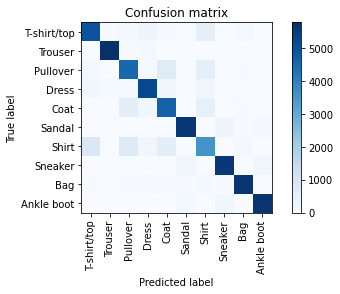

Logistic Regression CV Accuracy:  0.8541500000000001
Logistic Regression CV Precision:  0.8530485007624243
Logistic Regression CV Recall:  0.8530485007624243
Logistic Regression CV F1 Score:  0.8533777917352612


In [ ]:
log_scores = cross_val_score(log_clf, scaledX, train_labels, cv=3, scoring="accuracy") 
display_scores(log_scores)
log_accuracy = log_scores.mean()

train_labels_predict_log = cross_val_predict(log_clf, scaledX, train_labels, cv=3)
log_cm = confusion_matrix(train_labels, train_labels_predict_log)
log_precision = precision_score(train_labels, train_labels_predict_log, average='weighted')
log_recall = recall_score(train_labels, train_labels_predict_log, average='weighted')
log_f1_score = f1_score(train_labels, train_labels_predict_log, average='weighted')
print("Confusion Matrix: \n", log_cm)
print('\nPlotting confusion matrix')
plt.figure()
plot_confusion_matrix(log_cm, class_names)
plt.show()
print("Logistic Regression CV Accuracy: ", log_accuracy)
print("Logistic Regression CV Precision: ", log_precision)
print("Logistic Regression CV Recall: ", log_precision)
print("Logistic Regression CV F1 Score: ", log_f1_score)

Let us calculate accuracy, precision, recall, F1 score for **Ensemble with soft voting**

Scores: [0.8764 0.8739 0.8721]
Mean: 0.8741333333333333
Standard deviation: 0.001763204154058412
Confusion Matrix: 
 [[5122   14   90  208   17    6  476    2   64    1]
 [  17 5796   26  125   15    0   17    1    3    0]
 [  77   12 4741   56  674    2  397    0   41    0]
 [ 152   40   55 5402  193    0  141    1   16    0]
 [   7    9  466  221 4941    1  330    0   25    0]
 [   2    2    0    2    0 5715    0  182   25   72]
 [ 909   20  685  160  528    0 3598    0   99    1]
 [   0    0    1    0    0  142    0 5659   11  187]
 [  12    8   28   33   19   20   97   26 5754    3]
 [   1    1    0    1    0   68    0  198    7 5724]]

Plotting confusion matrix


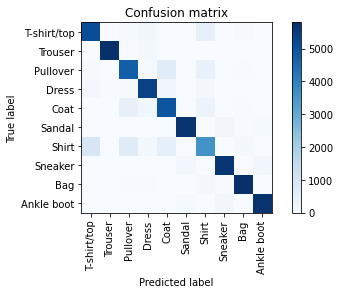

Ensembles with soft voting CV Accuracy:  0.8741333333333333
Ensembles with soft voting CV Precision:  0.8728893932084574
Ensembles with soft voting CV Recall:  0.8728893932084574
Ensembles with soft voting CV F1 Score:  0.8728967531039905


In [ ]:
ens_scores = cross_val_score(voting_clf, scaledX, train_labels, cv=3, scoring="accuracy") 
display_scores(ens_scores)
ens_accuracy = ens_scores.mean()

train_labels_predict_ens = cross_val_predict(voting_clf, scaledX, train_labels, cv=3)
ens_cm = confusion_matrix(train_labels, train_labels_predict_ens)
ens_precision = precision_score(train_labels, train_labels_predict_ens, average='weighted')
ens_recall = recall_score(train_labels, train_labels_predict_ens, average='weighted')
ens_f1_score = f1_score(train_labels, train_labels_predict_ens, average='weighted')
print("Confusion Matrix: \n", ens_cm)
print('\nPlotting confusion matrix')
plt.figure()
plot_confusion_matrix(ens_cm, class_names)
plt.show()
print("Ensembles with soft voting CV Accuracy: ", ens_accuracy)
print("Ensembles with soft voting CV Precision: ", ens_precision)
print("Ensembles with soft voting CV Recall: ", ens_precision)
print("Ensembles with soft voting CV F1 Score: ", ens_f1_score)

# Verify predictions on test data

Since we have finalized our model i.e XGBoostClassifier. Now lets find its scores and then will do predictions on test data using XGBoostClassifier model.


In [ ]:
test_labels_predict_xgb = xgb_clf.predict(scaledY)

In [ ]:
test_labels[0]

0

In [ ]:
test_labels_predict_xgb[0]

0

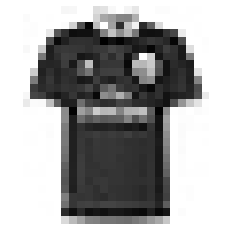

In [ ]:
showImage(flattened_test_images[0])

In [ ]:
xgb_accuracy = accuracy_score(test_labels, test_labels_predict_xgb)
xgb_precision = precision_score(test_labels, test_labels_predict_xgb, average='weighted')
xgb_recall = recall_score(test_labels, test_labels_predict_xgb, average='weighted')
xgb_f1_score = f1_score(test_labels, test_labels_predict_xgb, average='weighted')

print("XGBoost Classifier Accuracy: ", xgb_accuracy)
print("XGBoost Classifier Precision: ", xgb_precision)
print("XGBoost Classifier Recall: ", xgb_precision)
print("XGBoost Classifier F1 Score: ", xgb_f1_score)

XGBoost Classifier Accuracy:  0.8997
XGBoost Classifier Precision:  0.8986657164662324
XGBoost Classifier Recall:  0.8986657164662324
XGBoost Classifier F1 Score:  0.8983260237174642


# Conclusion

There is no difference between scores of test dataset and training dataset , hence, the conclusion is that our final model (XGBoost) is good enough, and it doesn’t have any overfitting or underfitting.

Although XGBoost (with n_estimators=100 and max_depth = 50) is good enough, there may be a chance to improve this model further, by say, increasing the number of estimators and trying out some more hyperparameters. 

As we see above, Ensemble also has given good results, we can try Ensemble with some more models and with some more hyperparameters to improve the results further. 
